# Google Play Store Advanced EDA + Linear Regression
## Advanced Exploratory Data Analysis

##  **Objective:**

To conduct a comprehensive Exploratory Data Analysis (EDA) and build a Linear Regression model to predict app ratings on the Google Play Store using two datasets: **`googleplaystore.csv`** and **`googleplaystore_user_reviews.csv`**.

### **Data Description:**

1. **googleplaystore.csv:** Contains details of applications on Google Play Store. It includes 13 features that describe a given app.
2. **googleplaystore_user_reviews.csv:** Contains the first 'most relevant' 100 reviews for each app, with each review text/comment pre-processed and attributed with three new features - Sentiment, Sentiment Polarity, and Sentiment Subjectivity.

# Importing Libraries


In [140]:
import re
import sys

import time
import datetime

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

%matplotlib inline

# Loading Data

In [141]:
data=pd.read_csv(r'D:\Bootcamp\Python\Portfolio Project 2\googleplaystore.csv')
reviews=pd.read_csv(r'D:\Bootcamp\Python\Portfolio Project 2\googleplaystore_user_reviews.csv')

# Data Loading, Cleaning and Exploration 

In [142]:
#set options to be maximum rows and columns max
pd.set_option('display.max_columns', None) # this is to display all the columns in the dataframe
pd.set_option('display.max_rows', None) # this is to display all the rows in the dataframe

#hide all warnings
import warnings
warnings.filterwarnings('ignore')

In [143]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [144]:
print(f'Number of Rows: {data.shape[0]}, Number of Columns: {data.shape[1]}')

Number of Rows: 10841, Number of Columns: 13


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [146]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


In [147]:
data.describe()

,Rating,Reviews
count,9367.000000,1.084100e+04
mean,4.191513,4.441119e+05
std,0.515735,2.927629e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.476800e+04
max,5.000000,7.815831e+07


In [148]:
# to check if there's any null value
data['Size'].isnull().sum()

0

In [149]:
data['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

## Values to change
1. 'Varies with device'
2. M
3. k

In [150]:
#creating a function to change these values and convert them into float

def convert_size(size):
    if isinstance (size, str):
        if 'Varies with device' in size:
            return 0
        elif 'M' in size:
            return float(size.replace('M', ''))*(1024*1024)
        elif 'k' in size:
            return float(size.replace('k',''))*1024
    return size

In [151]:
#applying the funciton

data['Size']= data['Size'].apply(convert_size)

In [152]:
# renaming the column as we converted the size into bytes
data.rename(columns={'Size': 'Size_in_bytes'}, inplace=True)

In [153]:
data['Size_in_bytes']

0         19922944.0
1         14680064.0
2          9122611.2
3         26214400.0
4          2936012.8
5          5872025.6
6         19922944.0
7         30408704.0
8         34603008.0
9          3250585.6
10        29360128.0
11        12582912.0
12        20971520.0
13        22020096.0
14        38797312.0
15         2831155.2
16         5767168.0
17        17825792.0
18        40894464.0
19        32505856.0
20        14680064.0
21        12582912.0
22         4404019.2
23         7340032.0
24        24117248.0
25         6291456.0
26        26214400.0
27         6396313.6
28         4823449.6
29         4404019.2
30         9646899.2
31         5452595.2
32        11534336.0
33        11534336.0
34         4404019.2
35         9646899.2
36        25165824.0
37               0.0
38        11534336.0
39         9856614.4
40        15728640.0
41        10485760.0
42               0.0
43         1258291.2
44        12582912.0
45        25165824.0
46        27262976.0
47         83

In [154]:
data['Size_in_MB']= round(data['Size_in_bytes']/(1024*1024), 2)
data['Size_in_MB'].isnull().sum()

0

# Installs Column

In [155]:
data['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [156]:
data['Installs'].isnull().sum()

0

In [157]:
#Removing '+' and ',' in the numbers and then convert the column into integer
data['Installs']= data['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x)
data['Installs']= data['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x)
data['Installs']= data['Installs'].apply(lambda x: int(x))

In [158]:
data['Installs'].value_counts()

1000000       1579
10000000      1252
100000        1169
10000         1054
1000           908
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Name: Installs, dtype: int64

In [159]:
# Specify the bin edges
bin_edges = [-1, 0, 100, 10000, 100000, 1000000, 10000000, 1000000000]

# Specify labels for the bins (one less label than edges)
bin_labels = ['no', 'Very Low', 'Low', 'Average', 'More than Average', 'High', 'Very High']

# Create a new column 'Install_category' using pd.cut() with labels
data['Install_category'] = pd.cut(data['Installs'], bins=bin_edges, labels=bin_labels)


In [160]:
data['Install_category'].value_counts()

Low                  2769
More than Average    2118
High                 2004
Average              1648
Very Low             1459
Very High             828
no                     15
Name: Install_category, dtype: int64

# Price Column

In [161]:
data['Price'].isnull().sum()

0

In [162]:
data['Price']= data['Price'].apply(lambda x: x.replace('$','') if '$' in str(x) else x)
data['Price']= data['Price'].apply(lambda x: float(x))

In [163]:
data['Price'].value_counts()

0.00      10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
24.99         7
3.49          7
7.99          7
5.49          6
19.99         6
11.99         5
6.49          5
12.99         5
8.99          5
10.00         3
16.99         3
1.00          3
2.00          3
13.99         2
8.49          2
17.99         2
1.70          2
3.95          2
79.99         2
7.49          2
9.00          2
10.99         2
39.99         2
33.99         2
1.96          1
19.40         1
4.80          1
3.28          1
4.59          1
15.46         1
3.04          1
4.29          1
2.60          1
2.59          1
3.90          1
154.99        1
4.60          1
28.99         1
2.95          1
2.90          1
1.97          1
200.00        1
89.99         1
2.56          1
1.20          1
1.26          1
30.99         1
3.61    

# Rating Column


In [164]:
# The best way to fill missing values might be using the median instead of mean.
data['Rating'] = data['Rating'].fillna(data['Rating'].median())


In [165]:
data.describe()

,Rating,Reviews,Size_in_bytes,Installs,Price,Size_in_MB
count,10841.000000,1.084100e+04,1.084100e+04,1.084100e+04,10841.000000,10841.000000
mean,4.206263,4.441119e+05,1.903206e+07,1.546291e+07,1.027273,18.150394
std,0.480830,2.927629e+06,2.324725e+07,8.502557e+07,15.948971,22.170297
min,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,4.100000,3.800000e+01,2.726298e+06,1.000000e+03,0.000000,2.600000
50%,4.300000,2.094000e+03,9.646899e+06,1.000000e+05,0.000000,9.200000
75%,4.500000,5.476800e+04,2.726298e+07,5.000000e+06,0.000000,26.000000
max,5.000000,7.815831e+07,1.048576e+08,1.000000e+09,400.000000,100.000000


In [166]:
data.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_MB,Install_category
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0.0,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up,19.0,Low
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up,14.0,More than Average
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0.0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up,8.7,High
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0.0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up,25.0,Very High
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0.0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up,2.8,Average


# Missing Values

In [167]:
data.isnull().sum().sort_values(ascending=False)

Current Ver         8
Android Ver         2
Category            1
Type                1
Genres              1
App                 0
Rating              0
Reviews             0
Size_in_bytes       0
Installs            0
Price               0
Content Rating      0
Last Updated        0
Size_in_MB          0
Install_category    0
dtype: int64

In [168]:
# length before removing null values
print(f"Length of the dataframe before removing null values: {len(data)}")

Length of the dataframe before removing null values: 10841


In [169]:
# remove the rows having null values in the 'Current Ver', 'Android Ver', 'Category', 'Type' and 'Genres' column
data.dropna(subset=['Current Ver', 'Android Ver', 'Category', 'Type', 'Genres'], inplace=True)

In [170]:
data.isnull().sum()

App                 0
Category            0
Rating              0
Reviews             0
Size_in_bytes       0
Installs            0
Type                0
Price               0
Content Rating      0
Genres              0
Last Updated        0
Current Ver         0
Android Ver         0
Size_in_MB          0
Install_category    0
dtype: int64

In [171]:
# length after removing null values
print(f"Length of the dataframe after removing null values: {len(data)}")

Length of the dataframe after removing null values: 10829


##### We removed a total of 12 values/rows.

---

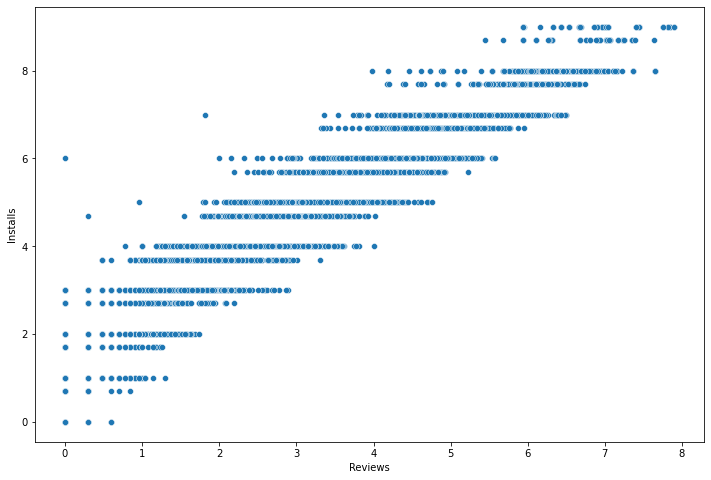

In [172]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=np.log10(data['Reviews']), y=np.log10(data['Installs']), data=data)
plt.show()

In [173]:
plt.figure(figsize=(12,8))
sns.barplot(x=np.log10(data['Type']), y=np.log10(data['Installs']))

# Add labels and title
plt.xlabel('App Type')
plt.ylabel('Total Installs')
plt.title('Number of Installs by App Type')

# Show the plot
plt.show()

TypeError: loop of ufunc does not support argument 0 of type str which has no callable log10 method

<Figure size 864x576 with 0 Axes>

## Number of Reviews increases with Number of Installs

In [ ]:
plt.figure(figsize=(12,8))
sns.lmplot(x='Reviews', y='Installs', data=data)

In [ ]:
data.info()

In [ ]:
# remove the duplicates
data.drop_duplicates(inplace=True)

In [ ]:
# print the number of rows and columns after removing duplicates
print(f"Number of rows after removing duplicates: {data.shape[0]}")

# Cleaning Reviews Data


In [ ]:
reviews.head()

In [ ]:
reviews.info()

In [ ]:
reviews.drop_duplicates(inplace=True)

In [174]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [175]:
reviews.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [176]:
reviews.dropna(inplace=True)

In [177]:
reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [178]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37427 entries, 0 to 64230
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     37427 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37427 non-null  object 
 3   Sentiment_Polarity      37427 non-null  float64
 4   Sentiment_Subjectivity  37427 non-null  float64
dtypes: float64(2), object(3)
memory usage: 1.7+ MB


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10829 entries, 0 to 10840
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   App               10829 non-null  object  
 1   Category          10829 non-null  object  
 2   Rating            10829 non-null  float64 
 3   Reviews           10829 non-null  int64   
 4   Size_in_bytes     10829 non-null  float64 
 5   Installs          10829 non-null  int64   
 6   Type              10829 non-null  object  
 7   Price             10829 non-null  float64 
 8   Content Rating    10829 non-null  object  
 9   Genres            10829 non-null  object  
 10  Last Updated      10829 non-null  object  
 11  Current Ver       10829 non-null  object  
 12  Android Ver       10829 non-null  object  
 13  Size_in_MB        10829 non-null  float64 
 14  Install_category  10829 non-null  category
dtypes: category(1), float64(4), int64(2), object(8)
memory usage: 1.2+ MB


In [180]:
merged_data = pd.merge(data, reviews, on='App', how='right')

In [181]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74103 entries, 0 to 74102
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   App                     74103 non-null  object  
 1   Category                72605 non-null  object  
 2   Rating                  72605 non-null  float64 
 3   Reviews                 72605 non-null  float64 
 4   Size_in_bytes           72605 non-null  float64 
 5   Installs                72605 non-null  float64 
 6   Type                    72605 non-null  object  
 7   Price                   72605 non-null  float64 
 8   Content Rating          72605 non-null  object  
 9   Genres                  72605 non-null  object  
 10  Last Updated            72605 non-null  object  
 11  Current Ver             72605 non-null  object  
 12  Android Ver             72605 non-null  object  
 13  Size_in_MB              72605 non-null  float64 
 14  Install_category      

# Data Encoding


In [182]:
# App values encoding
le = preprocessing.LabelEncoder()
data['App'] = le.fit_transform(data['App'])
# This encoder converts the values into numeric values

In [183]:
# Genres features encoding
le = preprocessing.LabelEncoder()
data['Genres'] = le.fit_transform(data['Genres'])

In [184]:
# Encode Content Rating features
le = preprocessing.LabelEncoder()
data['Content Rating'] = le.fit_transform(data['Content Rating'])

In [185]:
data['Category'].value_counts()

FAMILY                 1968
GAME                   1144
TOOLS                   841
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         390
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     230
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  82
EVENTS                   64
ART_AND_DESIGN           64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

# Liner Regression


In [186]:
# Data Splitting
features = ['App', 'Reviews', 'Size_in_MB', 'Installs', 'Price', 'Content Rating', 'Genres']
X = data[features]
y = data['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)

In [187]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [190]:
# Creating a Linear Regression model
model = LinearRegression()

# Fitting the model with the training data
model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = model.predict(X_test)

# Model Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [191]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error (MSE): 0.23579813493186896
Mean Absolute Error (MAE): 0.3173445979615695
R-squared: 0.006242040423147688
